In [1]:
!pip install bioinfokit


  Using cached bioinfokit-2.1.4.tar.gz (88 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib_venn-0.11.10-py3-none-any.whl.metadata (6.4 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------------------- ------------------- 81.9/165.5 kB 4.5 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 10.0 MB/s eta 0:00:01
   ---- ----------------------------------- 0.8/8.0 MB 9.0 MB/s eta 0:00:01
   --------- ---------------------------

In [7]:
!pip install openpyxl

   ---------------------------------------- 0.0/251.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/251.4 kB ? eta -:--:--
   ------------- -------------------------- 81.9/251.4 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  245.8/251.4 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 251.4/251.4 kB 2.6 MB/s eta 0:00:00


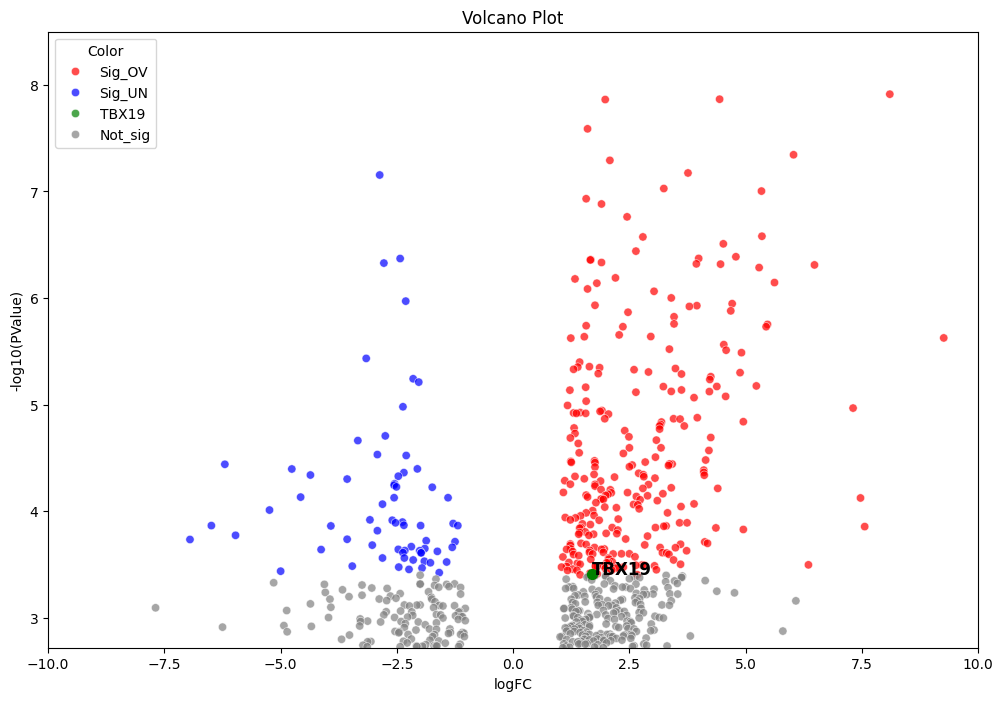

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('C:\\Users\\M315695\\Documents\\Galatic Baseballer\\sub table 3.xlsx')
# df = analys.get_data(
data.columns = ['GeneName', 'logFC', 'logCPM', 'PValue', 'FDR']

data['logFC'] = pd.to_numeric(data['logFC'], errors='coerce')
data['logCPM'] = pd.to_numeric(data['logCPM'], errors='coerce')
data['PValue'] = pd.to_numeric(data['PValue'], errors='coerce')
data['FDR'] = pd.to_numeric(data['FDR'], errors='coerce')

#plot
plt.figure(figsize=(12, 8))

#get log PValue
data['-log10(PValue)'] = -np.log10(data['PValue'])

#find sig
data['Significant'] = np.where(data['FDR'] < np.mean(data['FDR']),"Significant","Not Significant")
data["Expression"] = np.where(data['logFC'] < 0, "Underexpressed", "Overexpressed")


def determine_color(row):
    if row['GeneName'] == 'TBX19':
        return "TBX19"
    elif row["Significant"]:
        if row["Expression"] == "Overexpressed" and row['Significant'] == 'Significant':
            return "Sig_OV"
        elif row["Expression"] == "Underexpressed" and row['Significant'] == 'Significant':
            return "Sig_UN"
        else:
            return "Not_sig"
    
        
data["Color"] = data.apply(determine_color, axis=1) 


sns.scatterplot(x='logFC', y='-log10(PValue)',hue='Color',
                palette={'Sig_OV': 'red','Sig_UN': 'blue', 'Not_sig':'grey', 'TBX19': 'green'} , 
                data=data, alpha=0.7)
plt.title('Volcano Plot')
plt.xlabel('logFC')
plt.ylabel('-log10(PValue)')

# plt.legend(title= f" Significant (FDR < {np.round(np.mean(data['FDR']),2)}")

tbx19_data = data[data['GeneName'] == 'TBX19']
# print(tbx19_data)
plt.scatter(tbx19_data['logFC'],-np.log10(tbx19_data["PValue"]), color ='green', s=50)

# #analyzee this
for i in range(tbx19_data.shape[0]):
    plt.text(tbx19_data.iloc[i]['logFC'], tbx19_data.iloc[i]['-log10(PValue)'], 'TBX19',
             horizontalalignment='left', size='large', color='black', weight='semibold')
plt.ylim(min(-np.log10(data["PValue"])),8.5)
plt.xlim(-10,10)

plt.savefig('volcano_plot.pdf', format='pdf')
plt.show()